In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_2.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 100000
Number of columns: 9


In [5]:
missing_data = df.isnull().sum()
print(missing_data)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [6]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
#One Hot Encoding for Column = 'gender' and 'smoking_history'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns_to_encode = ['gender', 'smoking_history']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Text(0, 0.5, 'Count')

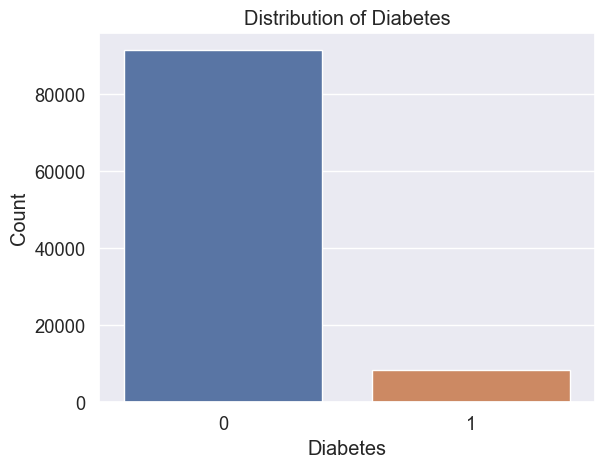

In [39]:
sns.countplot(x="diabetes", data=df)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")

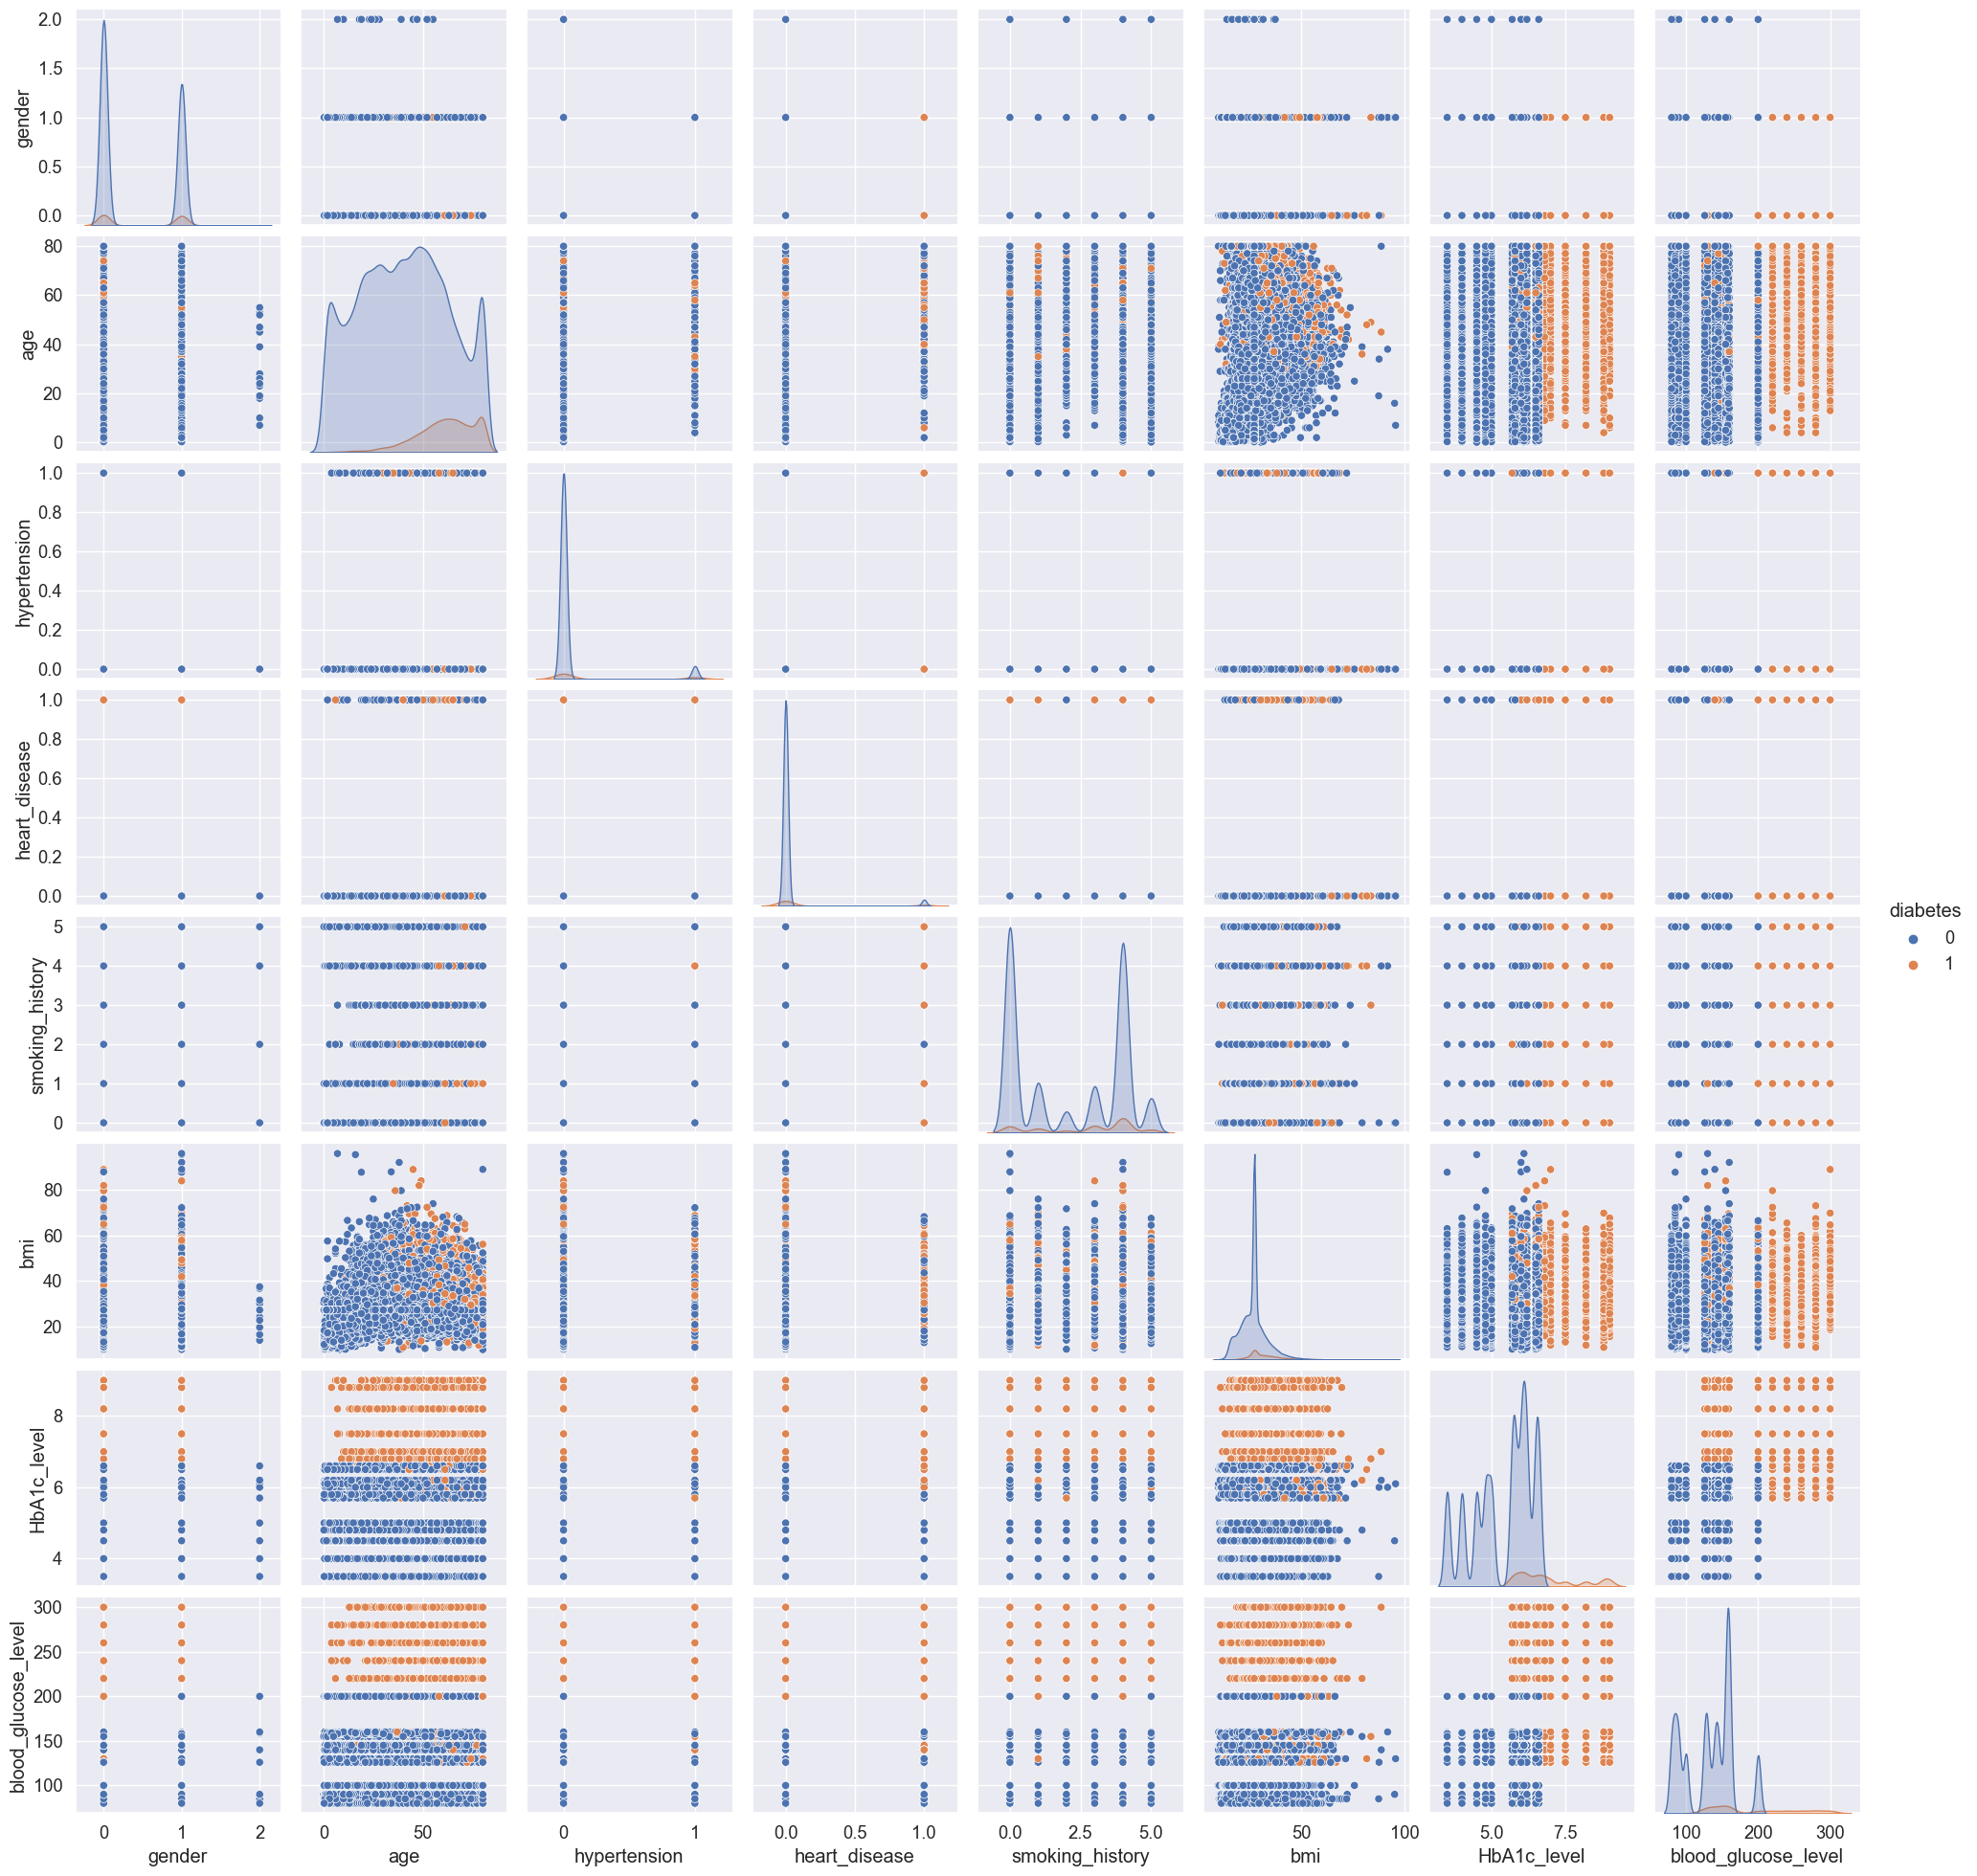

In [41]:
sns.pairplot(data = df, hue = 'diabetes')

In [43]:
sns.set(style="whitegrid", palette="Set2")

def freedman_bins(feature_name):
    iqr = df[feature_name].quantile(0.75) - df[feature_name].quantile(0.25)
    h = 2 * iqr / df.shape[0]**(1/3)
    num_bins = int((df[feature_name].max() - df[feature_name].min()) / h)
    return num_bins if num_bins <= 30 else 30

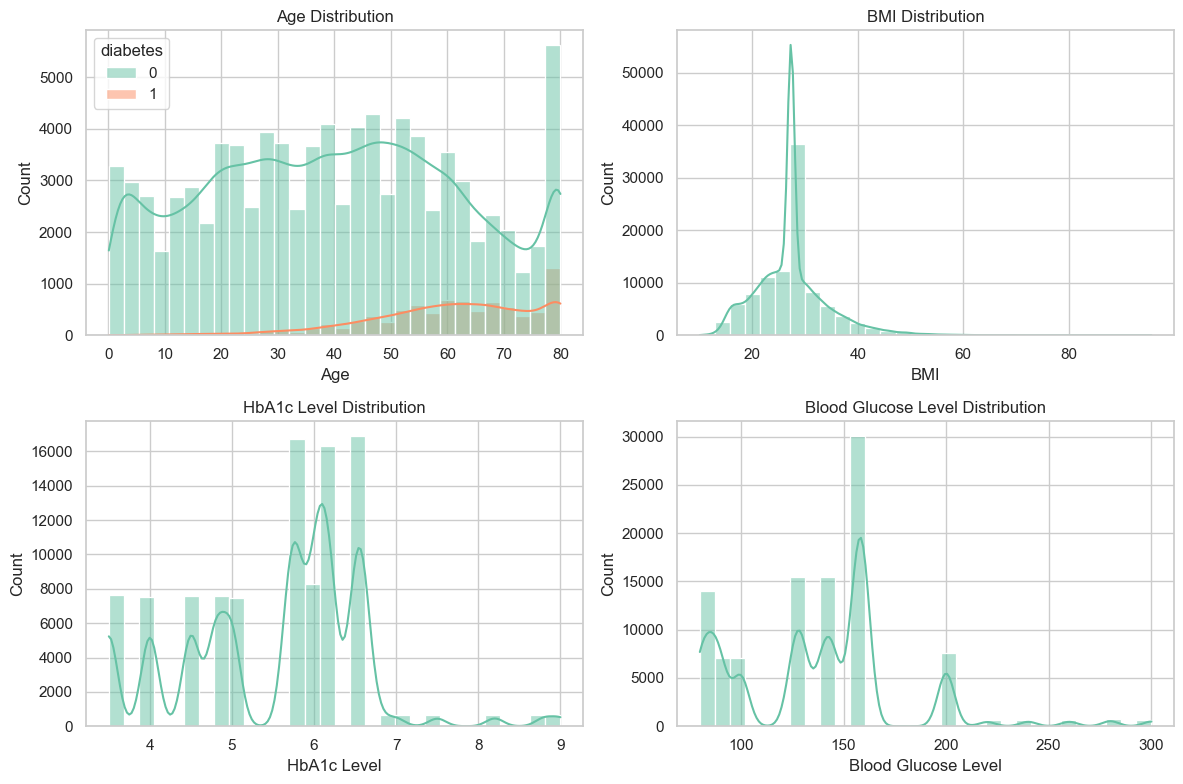

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Distribution of age
sns.histplot(data=df, x='age', bins=freedman_bins('age'), kde=True, ax=axes[0, 0], hue='diabetes')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

#Distribution of bmi
sns.histplot(data=df, x='bmi', bins=freedman_bins('bmi'), kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Count")

#Distribution of HbA1c_level
sns.histplot(data=df, x='HbA1c_level', bins=freedman_bins('HbA1c_level'), kde=True, ax=axes[1, 0])
axes[1, 0].set_title("HbA1c Level Distribution")
axes[1, 0].set_xlabel("HbA1c Level")
axes[1, 0].set_ylabel("Count")

#Distribution of blood glucose level
sns.histplot(data=df, x='blood_glucose_level', bins=freedman_bins('blood_glucose_level'), kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Blood Glucose Level Distribution")
axes[1, 1].set_xlabel("Blood Glucose Level")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

<AxesSubplot:>

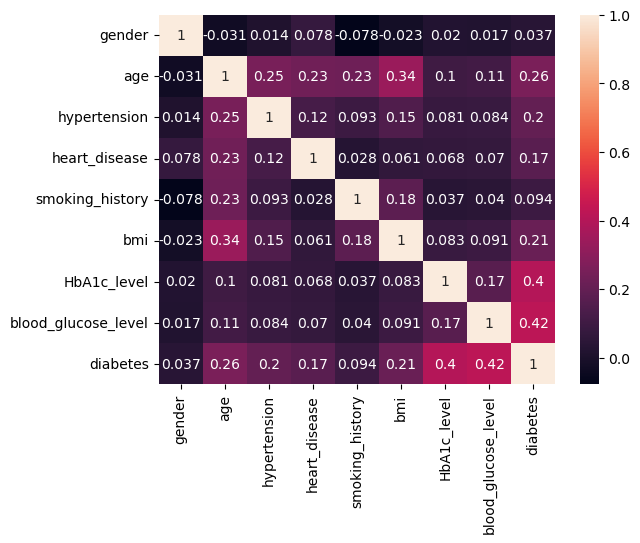

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred1)
print("\nClassification Report:")
print(report)

Accuracy: 90.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred2)
print("\nClassification Report:")
print(report)

Accuracy: 95.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.96     20000



In [15]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(X_train, y_train)

y_pred3 = clf_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred3)
print("\nClassification Report:")
print(report)

Random Forest Accuracy: 97.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [16]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)

clf_lr.fit(X_train, y_train)

y_pred4 = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred4)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

report = classification_report(y_test, y_pred4)
print("\nClassification Report:")
print(report)

Logistic Regression Accuracy: 95.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(X_train, y_train)

y_pred5 = clf_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred5)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

report = classification_report(y_test, y_pred5)
print("\nClassification Report:")
print(report)

Decision Tree Accuracy: 95.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

clf_gb.fit(X_train, y_train)

y_pred6 = clf_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred6)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

report = classification_report(y_test, y_pred6)
print("\nClassification Report:")
print(report)

Gradient Boosting Accuracy: 97.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [19]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)

clf_xgb.fit(X_train, y_train)

y_pred7 = clf_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred7)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

report = classification_report(y_test, y_pred7)
print("\nClassification Report:")
print(report)

XGBoost Accuracy: 97.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)

clf_knn.fit(X_train, y_train)

y_pred8 = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred8)
print(f"K-NN Accuracy: {accuracy_knn * 100:.2f}%")

report = classification_report(y_test, y_pred8)
print("\nClassification Report:")
print(report)

C:\Users\My PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-NN Accuracy: 95.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.84      0.64      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.90      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [21]:
from sklearn.metrics import mean_absolute_error
# the average of the absolute differences between the predicted and actual values.

rf_mae = mean_absolute_error(y_test, y_pred3)

gb_mae = mean_absolute_error(y_test, y_pred6)

lr_mae = mean_absolute_error(y_test, y_pred4)

nb_mae = mean_absolute_error(y_test, y_pred1)

svm_mae = mean_absolute_error(y_test, y_pred2)

knn_mae = mean_absolute_error(y_test, y_pred8)

dt_mae = mean_absolute_error(y_test, y_pred5)

xg_mae = mean_absolute_error(y_test, y_pred7)

print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Logistic Regression MAE: {lr_mae}")
print(f"Naive Bayes MAE: {nb_mae}")
print(f"Support Vector Machine MAE: {svm_mae}")
print(f"K-NN MAE: {knn_mae}")
print(f"Decision Tree MAE: {dt_mae}")
print(f"XGBoost MAE: {xg_mae}")

Random Forest MAE: 0.02925
Gradient Boosting MAE: 0.02755
Logistic Regression MAE: 0.0413
Naive Bayes MAE: 0.09525
Support Vector Machine MAE: 0.0405
K-NN MAE: 0.0412
Decision Tree MAE: 0.04765
XGBoost MAE: 0.02755


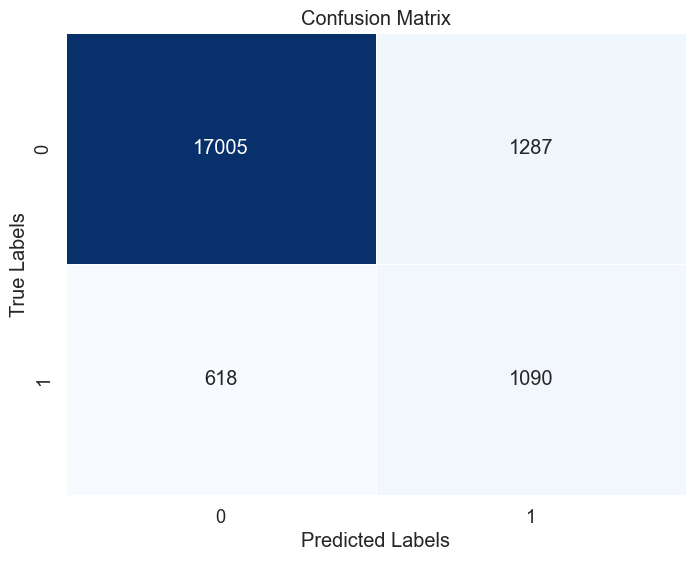

In [24]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

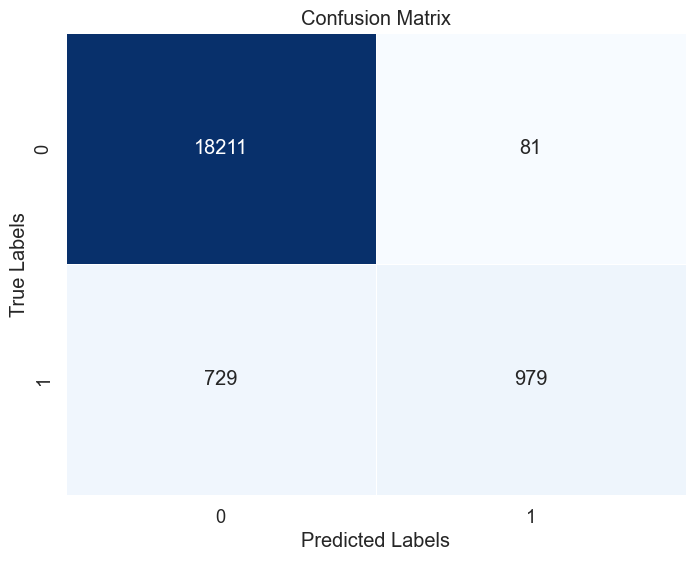

In [25]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

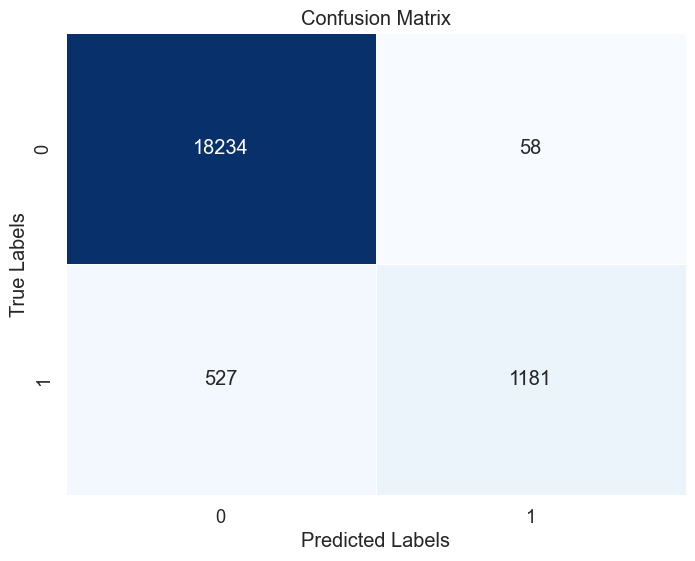

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

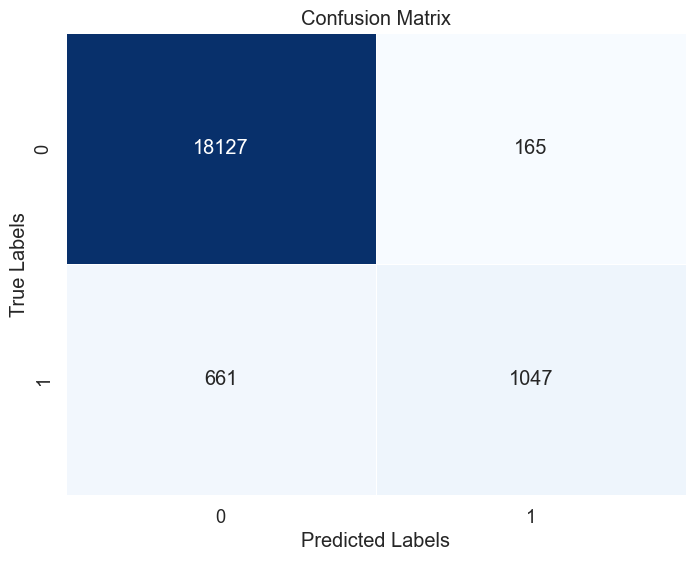

In [28]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

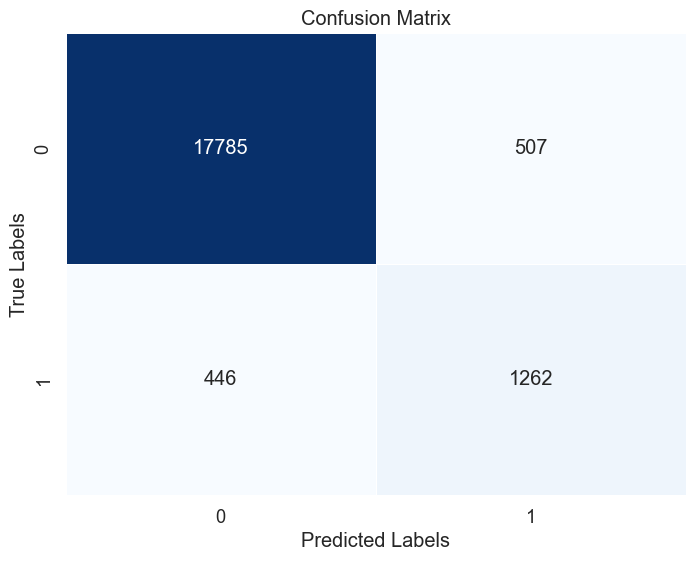

In [38]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

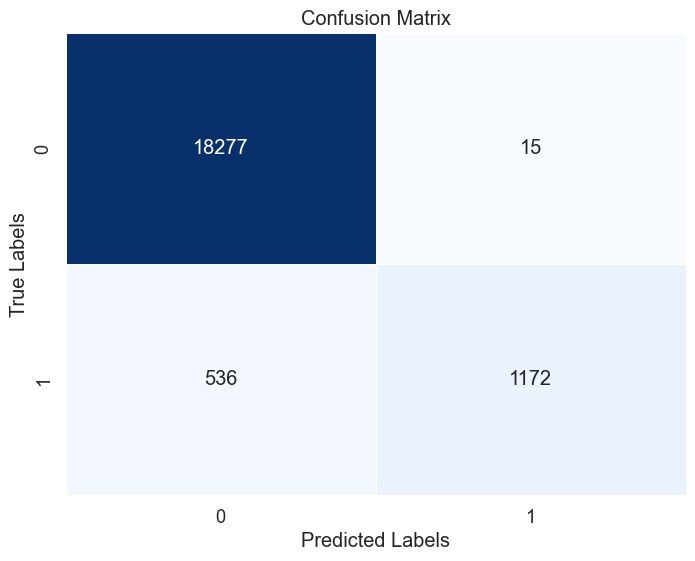

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred6)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

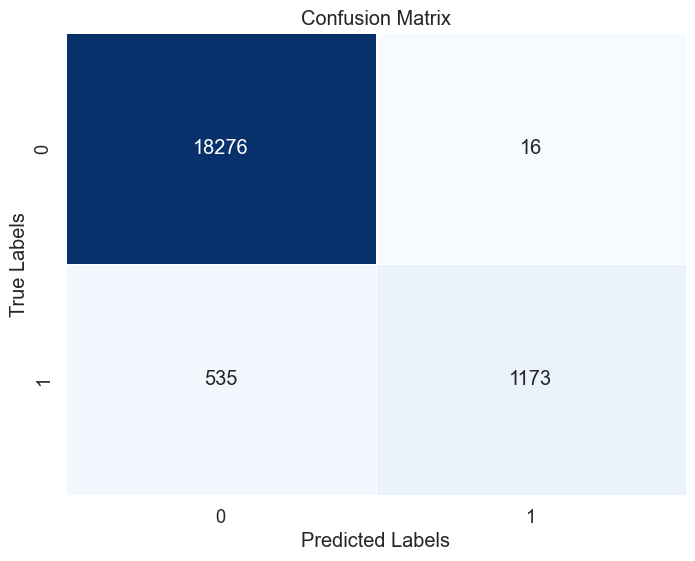

In [36]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred7)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

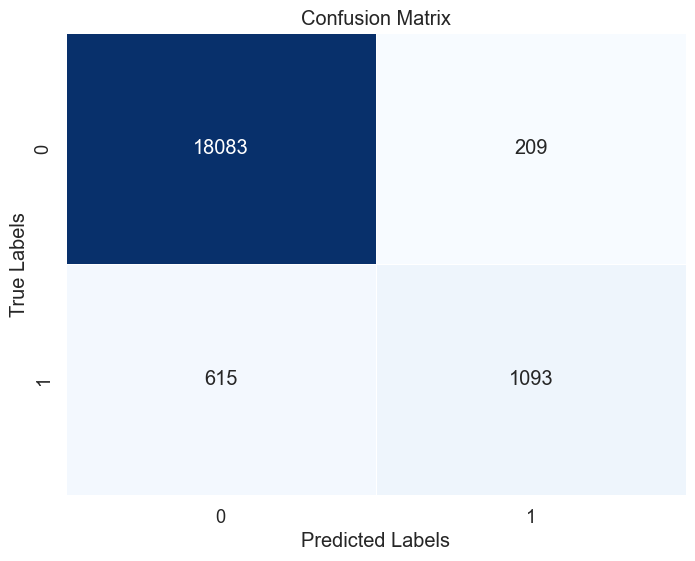

In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred8)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()